<a href="https://colab.research.google.com/github/holamgadol/AltaCV/blob/master/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D0%BA%D1%80%D0%B8%D0%B1%D0%B0%D1%86%D0%B8%D1%8F_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenAI_Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Видео-руководство](https://youtu.be/-KyqrwdTsN0)

[Whisper GitHub](https://github.com/openai/whisper)

1. Сделать копию на свой диск: File -> Save a Copy in Drive
2. Открыть сохраненную копию и действовать по шагам далее


# 1: Установка Whisper




In [ ]:
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-rs6ikabr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-rs6ikabr
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-

# Установка ffmpeg

[ffmpeg](https://ffmpeg.org) - ПО для работы с видео и аудио

In [ ]:
!sudo apt update && sudo apt install ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,974 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,691 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,375 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates

# 3 (вариант 1): Загрузка файла

Нажмите на значок папки слева и перетащите свои аудио/видео файлы в открывшуюся область.

Пример:

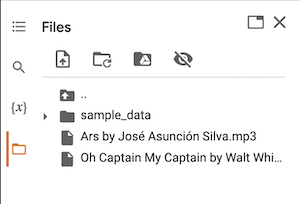




Транскрибация загруженного файла МойФайл.mp3

Важно указать путь и имя файла точно, соблюдая регистр.
Язык аудио распознается автоматически, но можно указать и явно через аргумент, например `--language ru`

In [ ]:
!whisper "МойФайл.mp3" --model medium

# 3 (вариант 2): Загрузка с Youtube


Установка зависимостей

In [ ]:
!pip install pytube


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


Код для загрузки файлов из плейлиста youtube

In [ ]:
import os, shutil, subprocess
from pytube import Playlist, YouTube

downloaded_files = []

def display_progress_bar(bytes_received, filesize, ch='█', scale=0.55):
    columns = 80
    max_width = int(columns * scale)

    filled = int(round(max_width * bytes_received / float(filesize)))
    remaining = max_width - filled
    bar = ch * filled + ' ' * remaining
    percent = round(100.0 * bytes_received / float(filesize), 1)
    text = ' ↳ |{bar}| {percent}%\r'.format(bar=bar, percent=percent)
    print(text)


def on_progress_callback(stream, chunk, bytes_remaining):
    filesize = stream.filesize
    bytes_received = filesize - bytes_remaining
    display_progress_bar(bytes_received, filesize)


def download_playlist(pl, out_dir):
    os.makedirs(out_dir, exist_ok=True)

    links = pl.video_urls
    for l in links:
        yt = (YouTube(l, on_progress_callback=on_progress_callback))

        audio = yt.streams.filter(file_extension="mp4").first()
        default_filename = audio.default_filename
        print(default_filename)
        print("Downloading " + default_filename + "...")

        audio.download()
        default_filename_remove_spaces = default_filename.replace(" ", "")
        try:
            os.rename(default_filename, default_filename_remove_spaces)
        except:
            pass

        new_filename = default_filename.replace("mp4", "mp3")
        new_filename_remove_spaces = new_filename.replace(" ", "")
        print("Converting to mp3....")

        subprocess.call(f"ffmpeg -i {default_filename_remove_spaces} {new_filename_remove_spaces}", shell=True)

        new_path = os.path.join(os.path.abspath(out_dir), new_filename_remove_spaces)
        shutil.move(new_filename_remove_spaces, new_path)
        downloaded_files.append(new_path)
        os.remove(default_filename_remove_spaces)

Загрузка аудио из плейлиста по ссылке `youtube_link` в директорию `output_dir`

In [ ]:
youtube_link = "https://www.youtube.com/playlist?list=PLjKvNeR1fbT196QOueStWpgYzIH4WDfZn"
output_dir = "source_audio"

pl = Playlist(youtube_link)
download_playlist(pl, output_dir)

АА Гиппиус О берестяных грамотах из раскопок сезона 2019 года.mp4
 ↳ |██                                          | 3.7%
 ↳ |███                                         | 7.4%
 ↳ |█████                                       | 11.2%
 ↳ |███████                                     | 14.9%
 ↳ |████████                                    | 18.6%
 ↳ |██████████                                  | 22.3%
 ↳ |███████████                                 | 26.0%
 ↳ |█████████████                               | 29.7%
 ↳ |███████████████                             | 33.5%
 ↳ |████████████████                            | 37.2%
 ↳ |██████████████████                          | 40.9%
 ↳ |████████████████████                        | 44.6%
 ↳ |█████████████████████                       | 48.3%
 ↳ |███████████████████████                     | 52.0%
 ↳ |█████████████████████████                   | 55.8%
 ↳ |██████████████████████████                  | 59.5%
 ↳ |████████████████████████████        

Транскрибация загруженных файлов по одному с сохранением результатов в директорию, заданную в `whisper_output`

In [ ]:
print(downloaded_files)

['/content/source_audio/ААГиппиусОберестяныхграмотахизраскопоксезона2019года.mp3', '/content/source_audio/ААГиппиусОберестяныхграмотахизраскопоксезона2019года.mp3', '/content/source_audio/ААГиппиусОберестяныхграмотахизраскопоксезона2018года.mp3', '/content/source_audio/ААЗализнякБерестяныеграмотысезона2014.mp3', '/content/source_audio/ААЗализнякОберестяныхграмотахизраскопоксезона2017года.mp3', '/content/source_audio/ААЗализнякЖивыемеханизмысовременногорусскогоударения.mp3', '/content/source_audio/ААЗализнякОВелесовойкниге.mp3', '/content/source_audio/ААЗализнякНовгородскиеберестяныеграмоты.mp3', '/content/source_audio/ААЗализнякОберестяныхграмотахизраскопоксезона2008года.mp3', '/content/source_audio/ААЗализнякОпрофессиональнойилюбительскойлингвистике.mp3', '/content/source_audio/ААЗализнякКонтурыисториирусскогоударения.mp3', '/content/source_audio/ААГиппиусБерестяныеграмотыкакживаяречь.mp3', '/content/source_audio/ААЗализнякОпроисхождениислов.mp3', '/content/source_audio/ААЗализнякОбер

In [ ]:
whisper_output = "transcribed"
for f in downloaded_files[1:]:
  !whisper {f} --model medium --language ru --output_dir {whisper_output}

[00:00.000 --> 00:17.200]  Добрый вечер. Раскопки в этом году и в Новгороде, и в Старой Руси продвигались своим чередом,
[00:17.200 --> 00:26.000]  и их результаты, с которыми я хотел бы вас познакомить, так в количественном отношении
[00:26.000 --> 00:33.080]  на первый взгляд напоминают прошлогодние, когда у нас в общей сложности было 12 грамот,
[00:33.080 --> 00:45.680]  11 в Новгороде одна в Старой Руси, а в этом году у нас 11 грамот, 9 в Новгороде и 2 в Руси.
[00:45.680 --> 00:51.600]  Вот вы видите, как они распределяются по раскопам. На двухтроицких раскопах,
[00:51.600 --> 01:01.120]  15 и 16 по 3 грамоты, еще на одном раскопе на Софийской стороне,
[01:01.120 --> 01:11.200]  который находится в районе древней Лукиной улицы, еще 3 грамоты и 2 грамоты в Старой Руси.
[01:11.200 --> 01:21.240]  Подчеркнуты целые документы, то есть у нас есть 4 целых грамоты на 11. В прошлом году было
[01:21.240 --> 01:31.040]  4 на 12. Но за этим сходством скрывается некоторое печальное различие, к

In [ ]:
from google.colab import drive
drive.mount('/content/drive')